In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import random
from spike_generator import *
#plt.style.use('seaborn-whitegrid');
plt.style.use('dark_background')
%matplotlib inline

## Task 5. Poisson paradox
For a constant rate Poisson process, every specific sequence of N spikes occuring over a given time interval is equally likely. This seems paradoxical because we certainly do not expect to see all N spikes appearing within the first 1% of the time interval. Resolve this paradox.

First, let's write the probability of N spikes to occur in an interval T:

$$
P_T[N] = \left(\frac{T}{N!}\right)^N \cdot \exp{(-rT)}
$$

As can be seen from this formula for Poisson distribution, the smaller $rT$ term and higher expected number of spikes $N$, the lesser probability that given $N$ spikes occur over given time interval. Therefore, it is more likely for $N$ spikes to occur over larger time interval. And we can consider $N$ occuring in the first 1% of the time interval the same as large expected value of $N$ spikes over short time interval + 0 spikes over 99% of the interval, which are both very unlikely events.

Now let's look at it from combinatorial perspective, suppose we have spike times 


$$
\{t_1, t_2,  \ ... \ , t_N\}
$$


let $N = 7$ spikes and let $M = 1000$ time bins, then 1% of bins is $F=1000 \cdot 0.01=10$. Now, what is the number of ways to put 7 spikes into 10
bins? It is the same as choosing 7 bins from 10, where order does not matter (1, 5, 10 and 5, 1, 10 does not change that spikes occur at those times)


$$
\frac{10!}{7!(10-7)!} = \frac{10\cdot 9 \cdot 8}{3 \cdot 2} = 120 
$$


So, we have 120 ways of putting 7 spikes into 10 bins and the number of ways to put 0 spikes into 990 bins is 1. ($120 \cdot 1 = 1$)
And the general number of ways to put 7 spikes into 1000 bins is:


$$
\frac{1000!}{7!(1000-7!)} = 194280608456793000
$$


The fraction $\frac{120}{194280608456793000}$ is very small. Even if we account for "shifts of this 1%" we will not get much higher probability:


$$
120 \cdot (1000/10) = 12 0000; \ \frac{12 000}{194280608456793000} = 6.176 \cdot 10^{-14}
$$


Therefore, although each combination is equally likely over a given time interval, the total number of such "spikes in the 1% of time" combinations is limited compared to the
total number of combinations.
Actually, such combinatorial reasoning coupled with limit $\Delta t \rightarrow 0$ is used in the derivation of the above formula for Poisson distribution.

## Task 6. White-noise stimulus
Build an approximate white-noise stimulus by choosing random values at discrete times separated by time interval $\Delta t$. Plot its **autocorrelation** function and **power spectrum**. Discuss how well this stimulus matches an ideal white-noise stimulus given the value of $\Delta t$ you used.

Let's assume that whatever stimulus we had, we normalized it to be in range the $[0, 1]$:

In [2]:
Δt = 1e-2
time = np.arange(0, 10, Δt)
stimulus = np.random.uniform(0, 10, *np.shape(time)) 

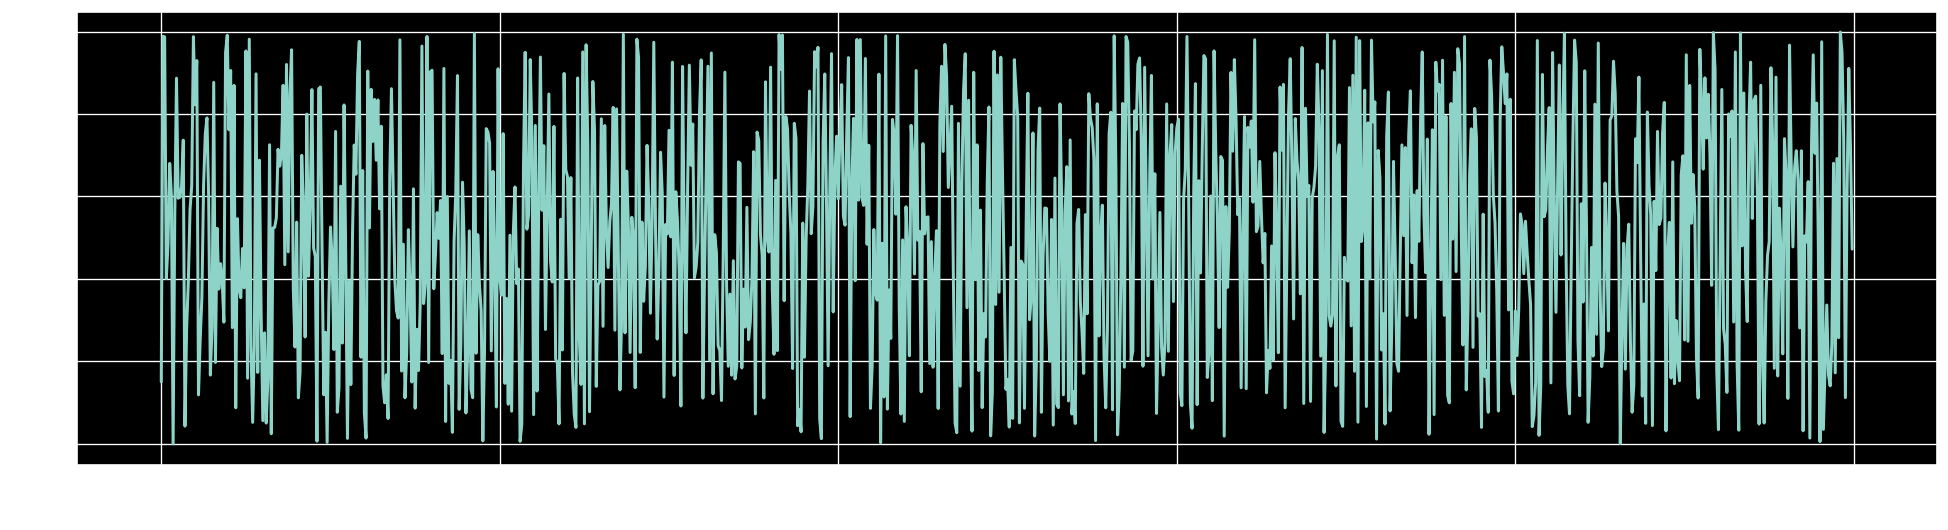

In [3]:
plt.figure(figsize=(20, 5), dpi=120);
plt.plot(time, stimulus, lw=1.8);
plt.xlabel('time [s]', fontsize=17);
plt.ylabel('s(t)', rotation=0, fontsize=17, labelpad=12);

### Power spectrum
First, let's plot just spectral density

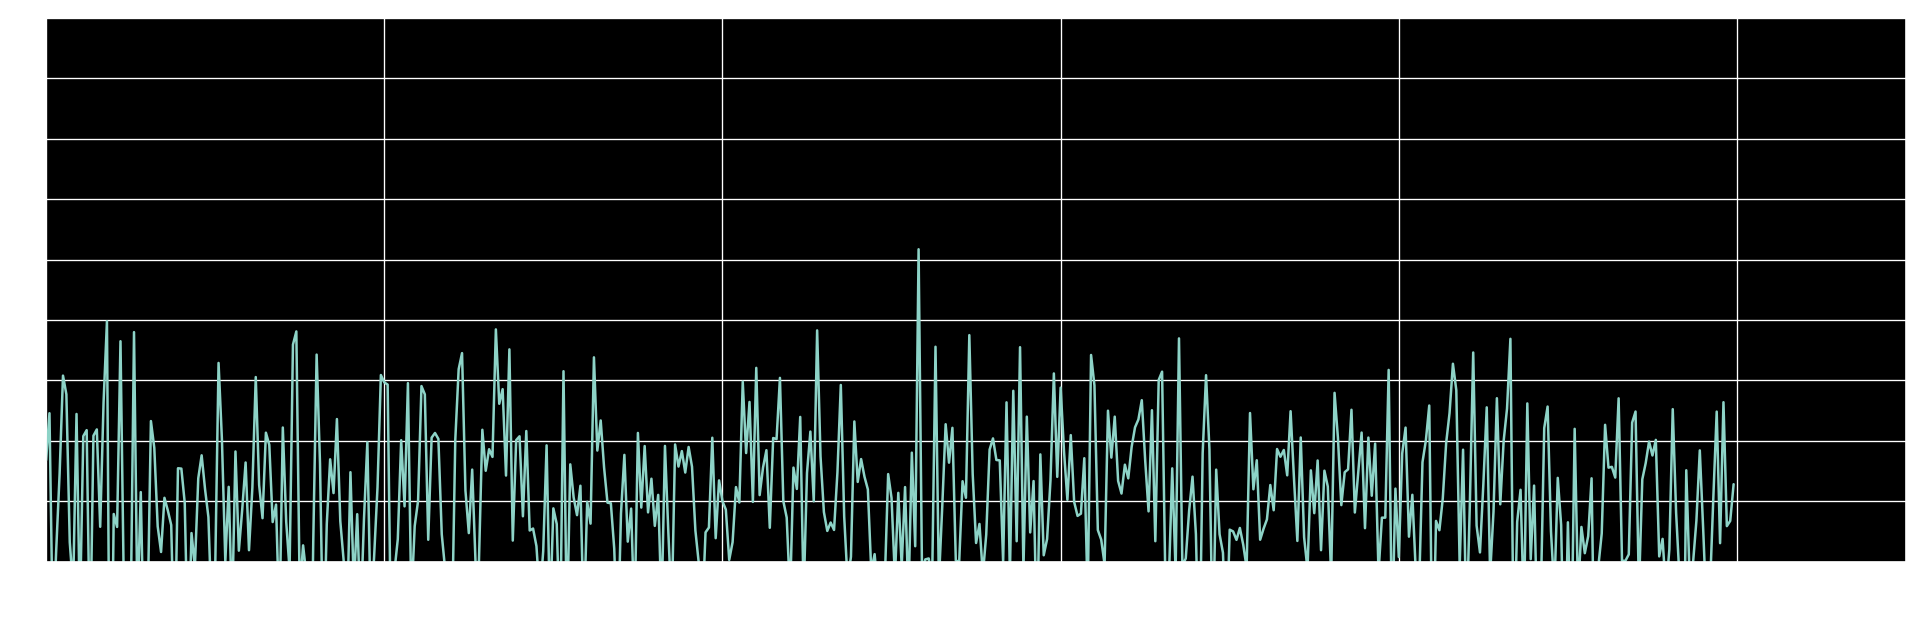

In [6]:
spectrum = np.fft.fft(stimulus)
freqs = np.fft.fftfreq(time.size, Δt)
plt.figure(figsize=(20, 6), dpi=120);
plt.plot(sorted(freqs), spectrum.real);
plt.xlim(0, 55);
plt.ylim(-50, 400);
plt.xlabel('Frequency, Hz', fontsize=20);
rc('xtick', labelsize=20);

Our spectrum ends at 50 Hz due to the limitation of our Δt, the maximum possible frequency is $1/(2 \cdot \Delta t) = 50 Hz$ (it is similar to the resolution of some measuring instrument)

And now the actual **power spectrum**

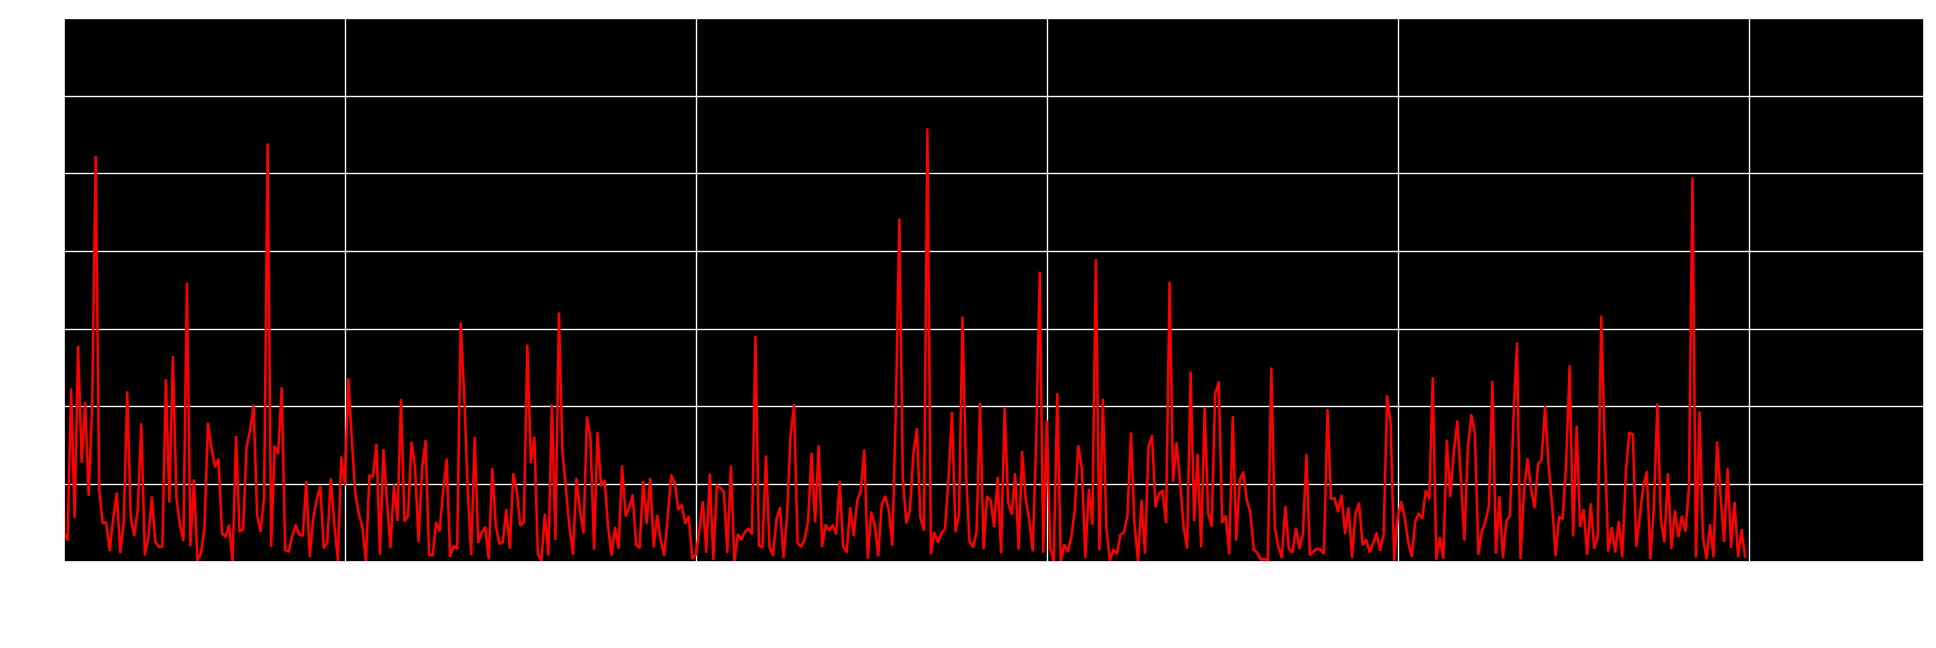

In [7]:
power_spectrum = np.abs(spectrum)**2
plt.figure(figsize=(20, 6), dpi=120);
plt.plot(sorted(freqs), power_spectrum, lw=1.5, color='red');
plt.xlim(2, 55);
plt.ylim(0, 7e4);
plt.xlabel('Frequency, Hz', fontsize=20);
rc('xtick', labelsize=20);

### Autocorrelation
Finally, **autocorrelation** of white-noise stimulus. But, for better approximatin, let's generate white noise for a longer period of time

(0.0, 8.0)

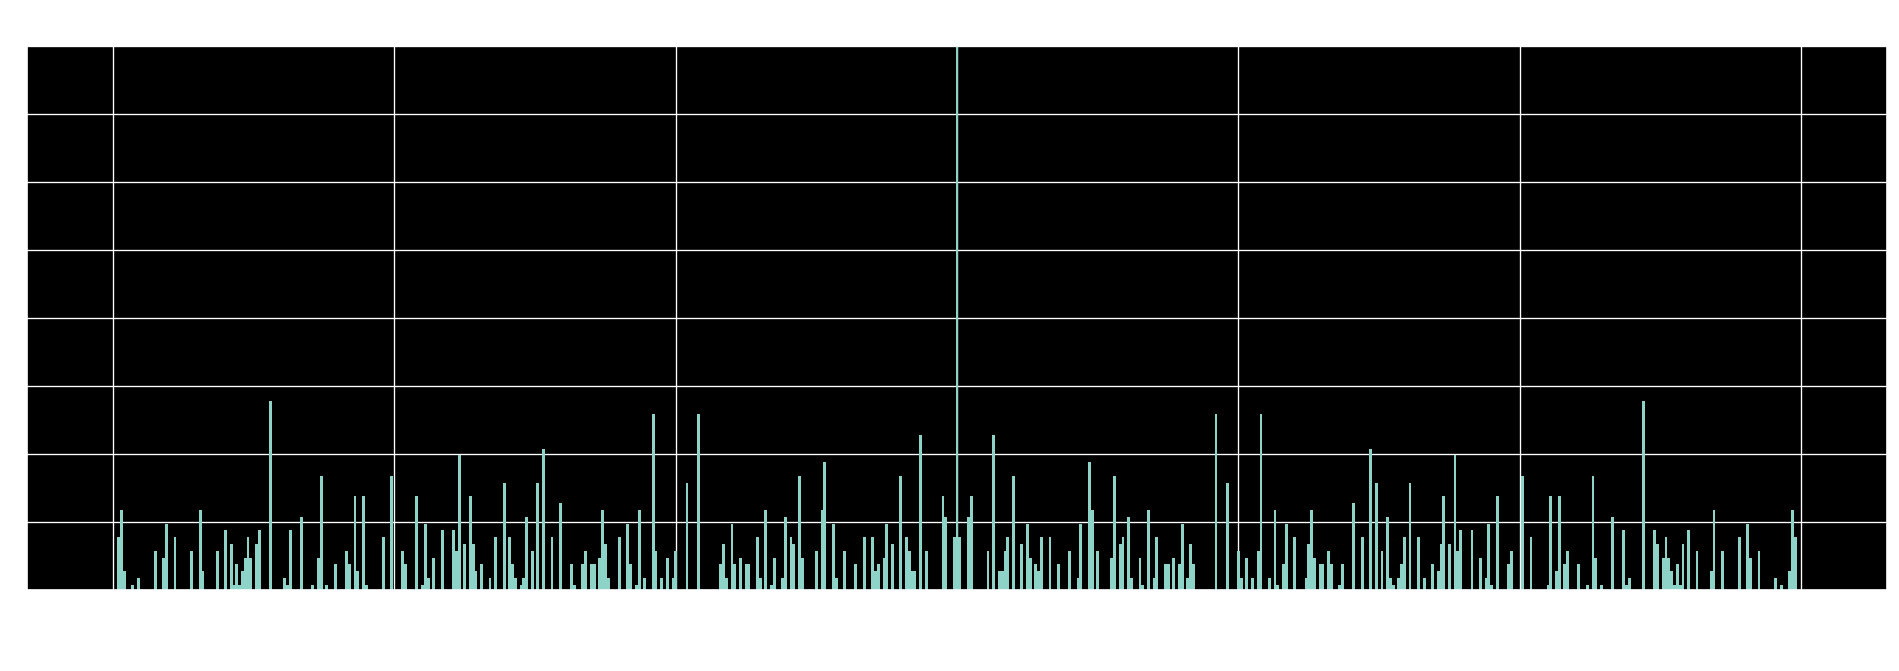

In [8]:
Δt = 1e-2
time_longer = np.arange(0, 10, Δt)
stimulus_longer = np.random.uniform(0, 10, *np.shape(time_longer))
locs, freqs = autocorrelation(stimulus, time_lag=300, dt=1e-3)
plt.figure(dpi=120, figsize=(20,6))
plt.bar(locs, freqs, width=1)
plt.xlabel('Time lag, ms', fontsize=17)
plt.title('Autocorrelation histogram for white noise', fontsize=20)
plt.ylim(0, 8)

From all the above plots it is evident that our white-noise approximation is pretty good: we don't have any significant differences in amplitudes for our frequencies nor have noticeable autocorrelation for any given time lag.

Let's also try to generate white-noise from a normal dustribution

In [9]:
σ = 1 # reflects the magnitude of the variability of the white-noise
stimulus2 = np.random.normal(0, σ**2/Δt, time.size)

Text(0.5, 1.0, 'Gaussian white-noise')

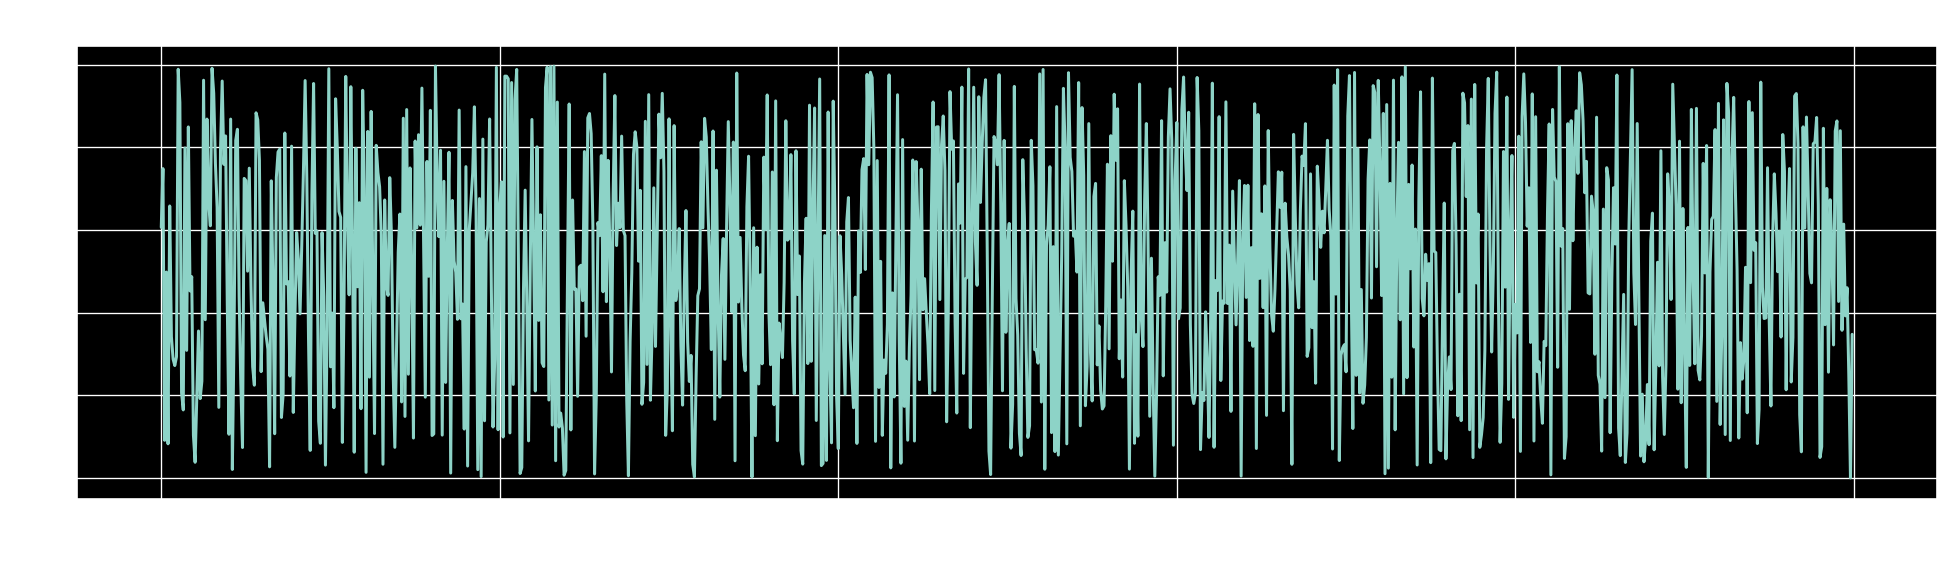

In [10]:
plt.figure(figsize=(20, 5), dpi=120);
plt.plot(time, stimulus, lw=1.8);
plt.xlabel('time [s]', fontsize=17);
plt.ylabel('s(t)', rotation=0, fontsize=17, labelpad=12);
plt.title('Gaussian white-noise', fontsize=20)

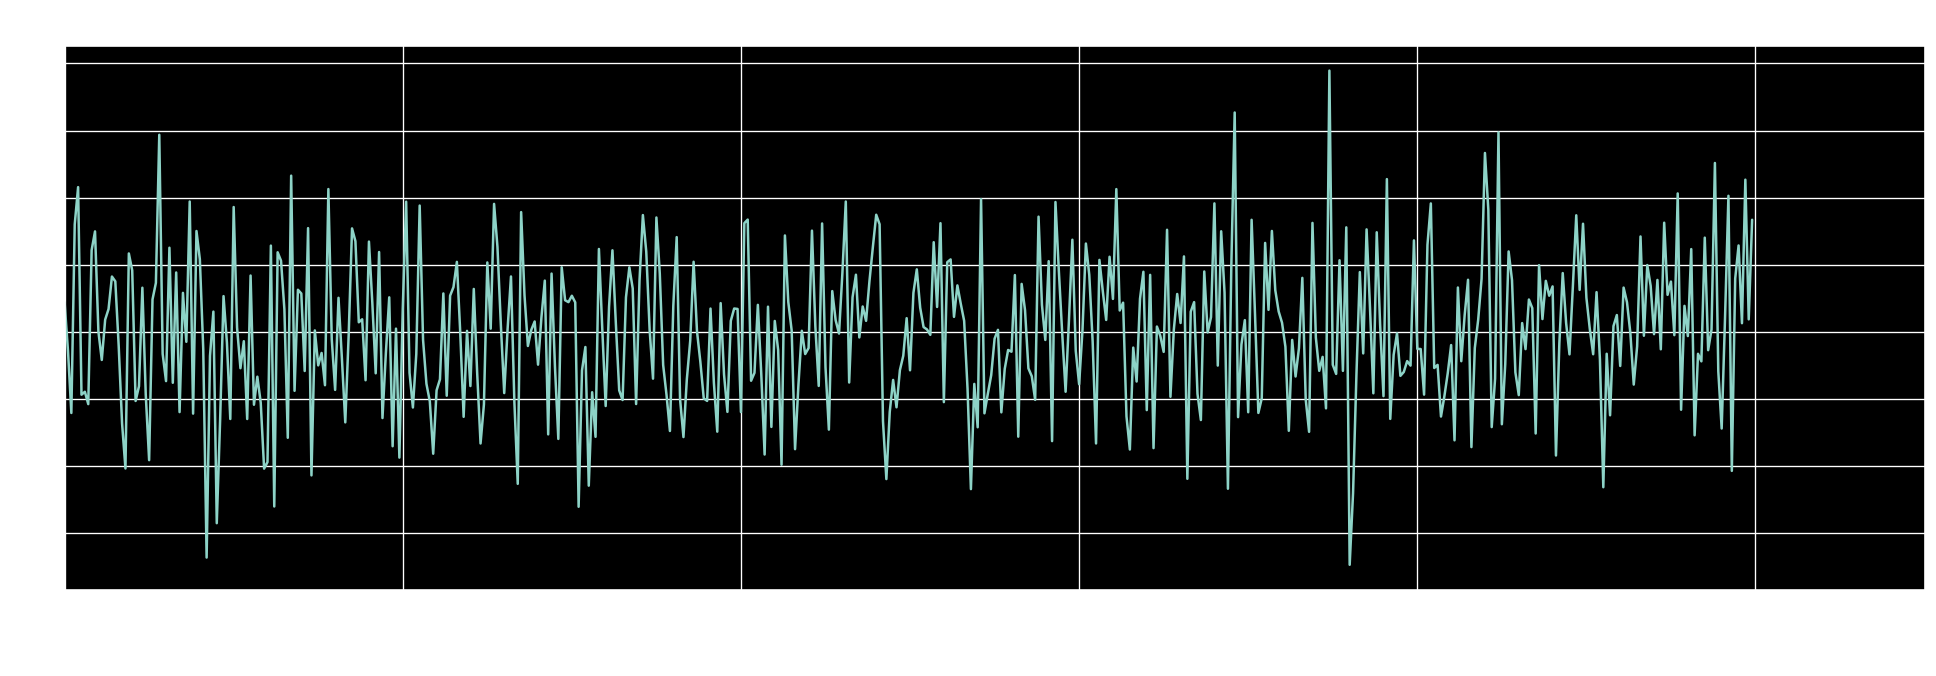

In [238]:
spectrum2 = np.fft.fft(stimulus2)
plt.figure(figsize=(20, 6), dpi=120);
plt.plot(sorted(freqs), spectrum2.real);
plt.xlim(0, 55);
#plt.ylim(-50, 400);
plt.xlabel('Frequency, Hz', fontsize=20);
plt.title('Gaussian white-noise spectral density', fontsize=20)
rc('xtick', labelsize=20);

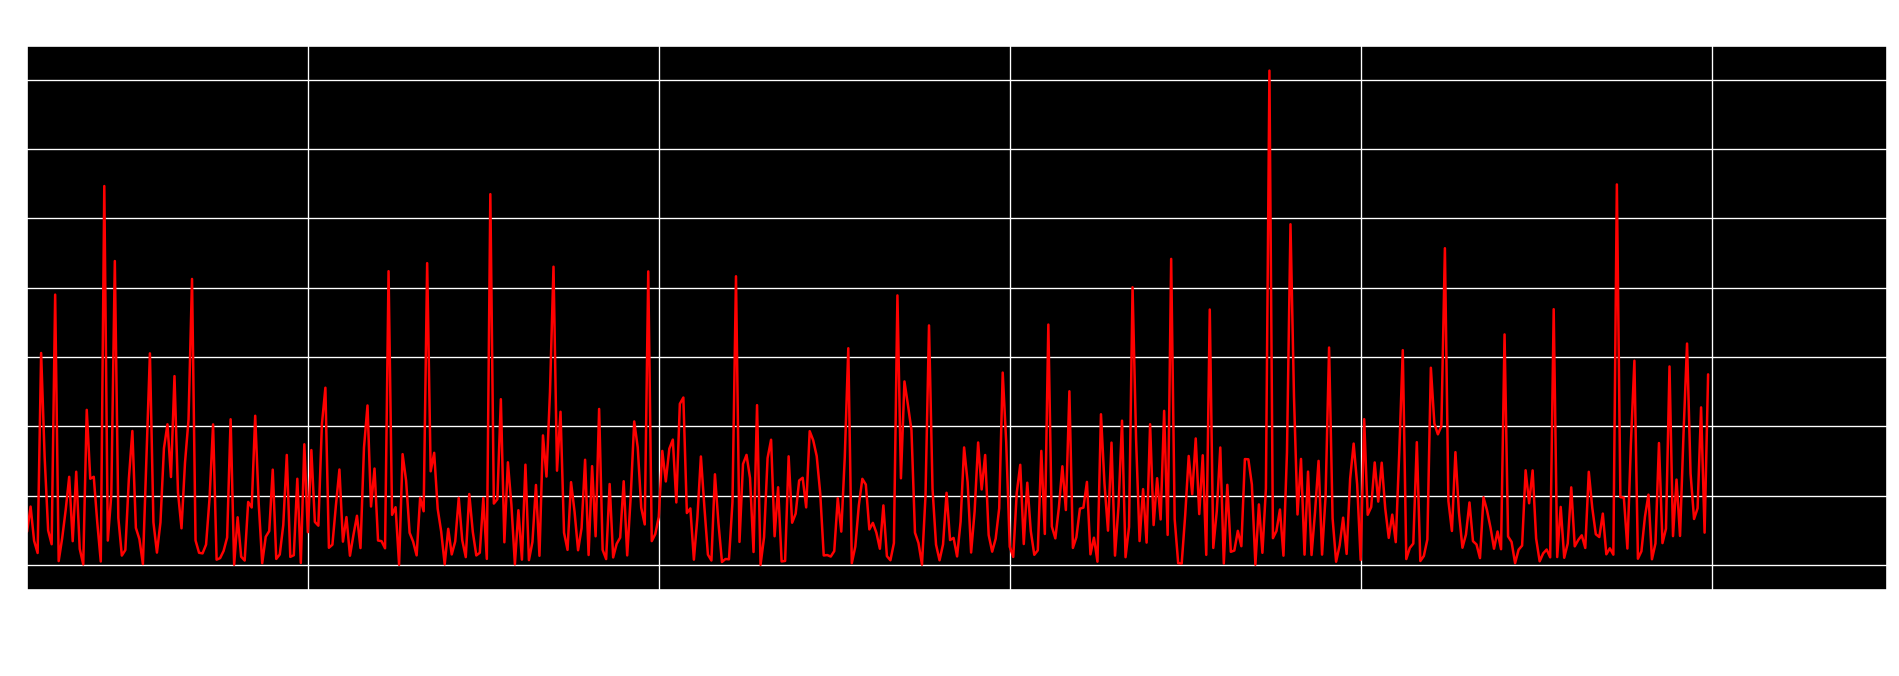

In [248]:
power_spectrum2 = np.abs(spectrum2)**2
plt.figure(figsize=(20, 6), dpi=120);
plt.plot(sorted(freqs), power_spectrum2, lw=1.5, color='red');
plt.xlim(2, 55);
plt.xlabel('Frequency, Hz', fontsize=20);
plt.title('Gaussian white-noise power spectrum', fontsize=20)
rc('xtick', labelsize=20);

## Task 7
Consider a model with a firing determined in terms of a stimulus $s(t)$ by integrating the equation:

$$
\tau_r \frac{dr_{est}(t)}{dt} = [r_0 + s(t)]_+ - r_{est}(t)
$$

where $r_0$ determines background firing rate and $\tau_r = 20 \ ms$. Drive the model with an approximate white-noise stimulus.

In [4]:
from scipy.integrate import solve_ivp
np.random.seed(2678)

def s(t):
    '''White noise input to diff. eq.
    '''
    s_val = np.random.normal(0, 40)
    return s_val 

def diff_r_est(t, r):
    '''Write our differential equation as a function for solve_ivp
    '''
    r_0 = 40 # Hz
    τ_r = 20/1000  # ms
    
    if r_0 + s(t) > 0:
        drdt = (r_0 + s(t) - r)/τ_r
    else:
        drdt = -r/τ_r
    return drdt

# Define time spans, initial values, and constants
tspan = np.linspace(0, 10, 1000)
r_init = [40]

# Solve differential equation
sol = solve_ivp(lambda t, r: diff_r_est(t, r),
                [tspan[0], tspan[-1]], r_init, t_eval=tspan)

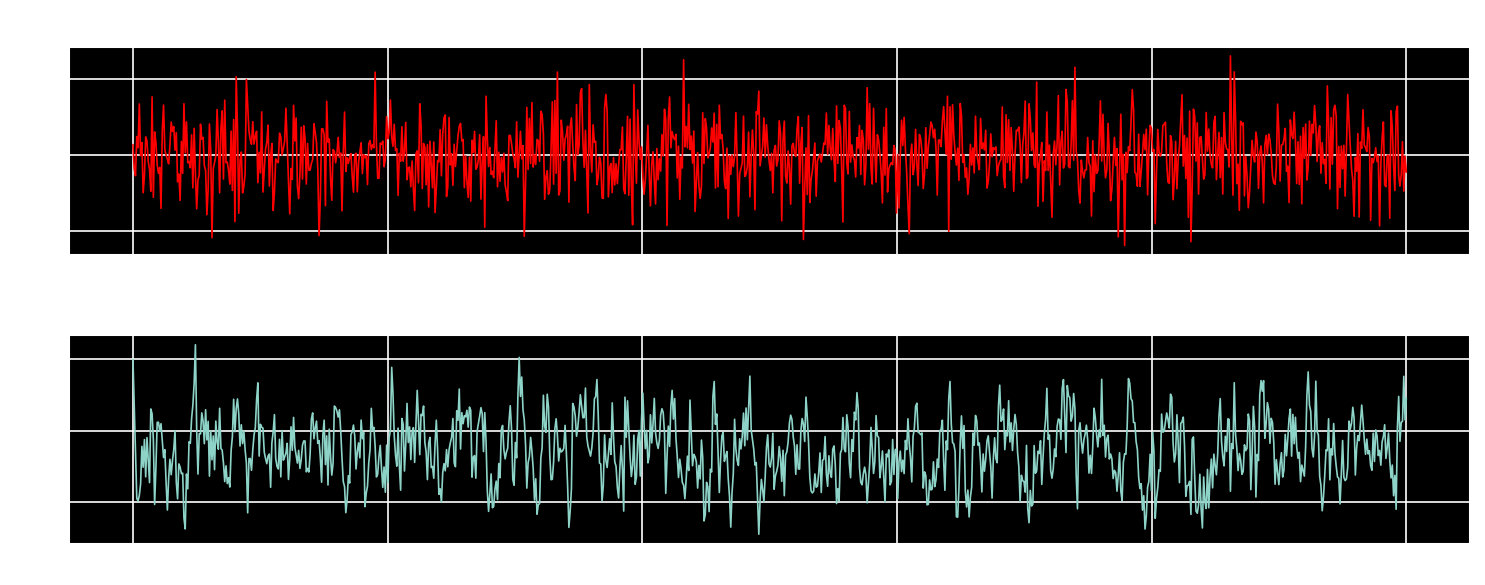

In [5]:
np.random.seed(2678)
fig, ax = plt.subplots(2, 1, dpi=150, figsize=(10, 4))
ax[0].plot(sol.t, np.array([s(t) for t in sol.t]), 'r-', lw=0.8)
ax[0].set_title('White-noise input')
ax[1].plot(sol.t, sol.y[0], lw=0.8)
ax[1].set_title('Firing rate driven by white-noise')
plt.tight_layout()

In [115]:
np.random.normal(20, 50)

-3.321234268566009